In [1]:
!git clone https://github.com/michaelhunter12/KNN.git

Cloning into 'KNN'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 56 (delta 13), reused 29 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 20.31 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?

Regression is used to predict a numerical value, whereas classification is used to predict a category.

2. What is a confusion table? What does it help us understand about a model's performance?

Confusion table cross tabulates predicted and true values. They help inform whether a model is doing well nor not. Helps understand accuracy.

3. What does the SSE quantify about a particular model?

It quantifies the difference between the predicted values and observed data point.

4. What are overfitting and underfitting?

Overfitting happens when the model is trained too well on the data and becomes unable of actually looking at the trends, meaning it cannot make good predctions on new data.

Underfitting occurs when the model is not robust enough.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

You don't want the model to be fit on test data, as it essentially leads to confirmation bias. Choosing k by evaluating accuracy on the test set improves model performance because it is able to show where the minimum error occurs.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

First: It is easy to understand a prediction. It fails because it does not take into account probability, meaning that the prediction should be taken with limited confidence.

Second: It is strong because it is easier to have confidence in the output. However, if the model is poor, the probabilities will also be poor, leading to negative consequences.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

Done

There were no `NA`'s to handle (i think)

2499 x 13

2. Maxmin normalize `year` and `mileage`.

Done

3. Split the sample into ~80% for training and ~20% for evaluation.

Done

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

As you increase $k$, the MSE goes down, but there appears to be a $k$ value inbetween 50 and 100 where the lowest MSE is attained. Past 100, MSE values increase again.

5. Determine the optimal $k$ for these data.

88

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

At small $k$ values, the model was overfitting the data because thats "all it could see". It only had a very small subset of observations to run on, so it could not make very good predictions, as it was heavily relying on the training data. However, as $k$ increased, the predictions got better (seen in the lowering of MSE), until it reached a minimum at 88 (optimal $k$ value). Past this point, the model was underfitting, as there were "too many" data points it was looking at, and it could not predict and capture its local environment.

In [ ]:
cars1 = pd.read_csv("./KNN/data/USA_cars_datasets.csv")
cars1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
cars1.shape

(2499, 13)

In [ ]:
cars2 = cars1[['price', 'year', 'mileage']]
cars2.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
display(cars2.isnull().sum())

,0
price,0
year,0
mileage,0


In [ ]:
def minmax_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

cars2['year_norm'] = minmax_normalize(cars1['year'])
cars2['mileage_norm'] = minmax_normalize(cars1['mileage'])

cars2.head()

/tmp/ipython-input-1822031513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['year_norm'] = minmax_normalize(cars1['year'])
/tmp/ipython-input-1822031513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['mileage_norm'] = minmax_normalize(cars1['mileage'])


,price,year,mileage,year_norm,mileage_norm
0,6300,0.744681,0.269287,0.744681,0.269287
1,2899,0.808511,0.187194,0.808511,0.187194
2,5350,0.957447,0.038892,0.957447,0.038892
3,25000,0.872340,0.063016,0.872340,0.063016
4,27700,0.957447,0.006537,0.957447,0.006537


In [ ]:
from sklearn.model_selection import train_test_split

X = cars2[['year_norm', 'mileage_norm']]
y = cars2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

k = 3, Mean Squared Error (MSE): 159200762.09


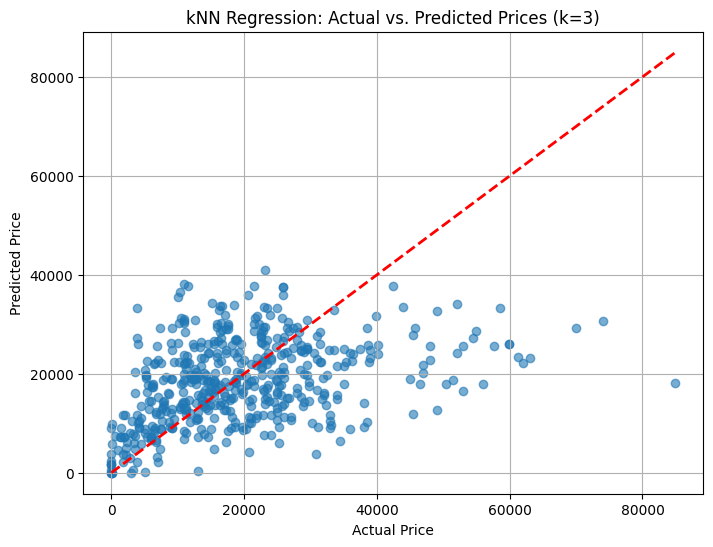

k = 10, Mean Squared Error (MSE): 138929910.76


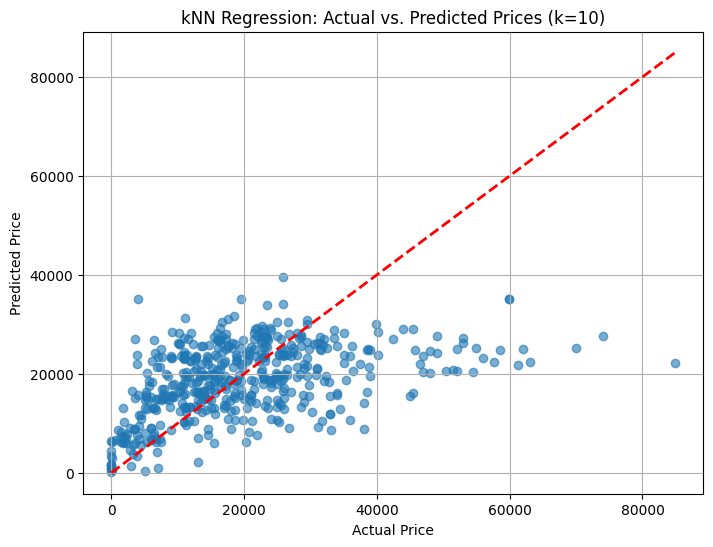

k = 25, Mean Squared Error (MSE): 130605395.06


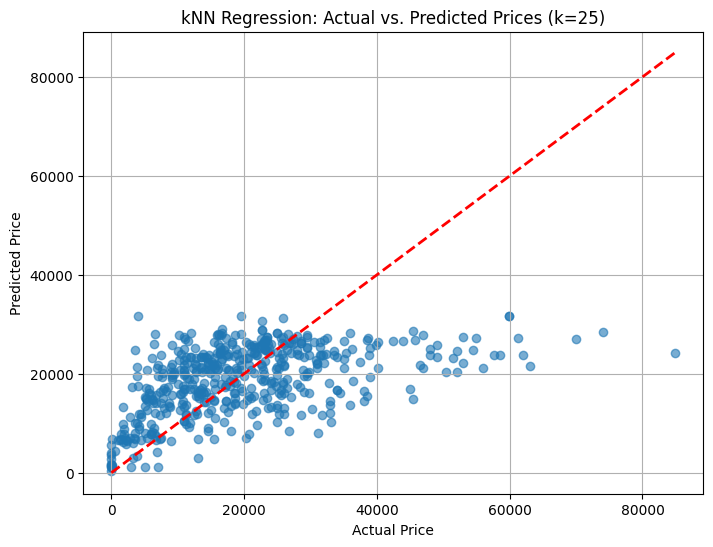

k = 50, Mean Squared Error (MSE): 129637841.19


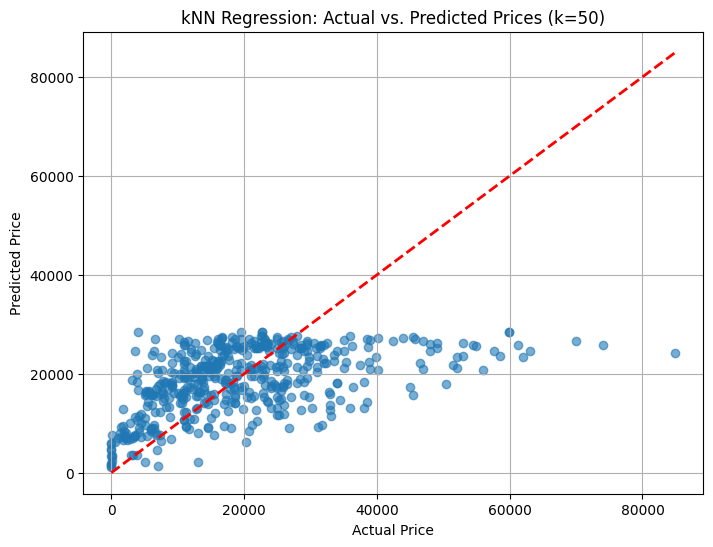

k = 100, Mean Squared Error (MSE): 128157897.62


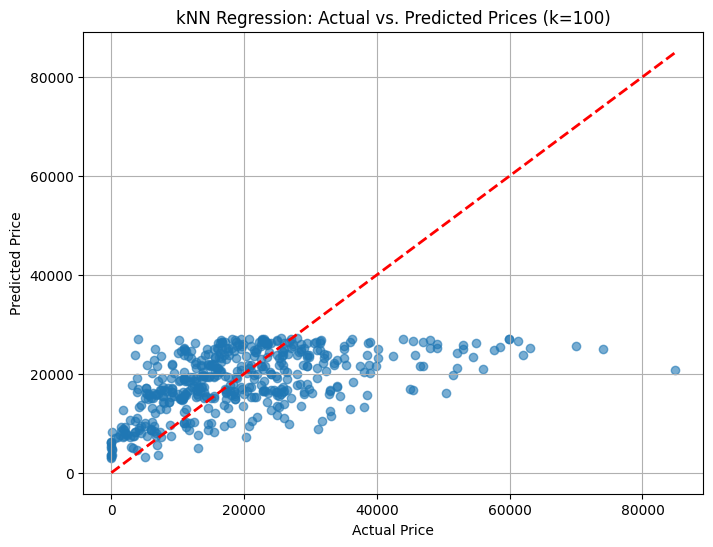

k = 300, Mean Squared Error (MSE): 131470944.20


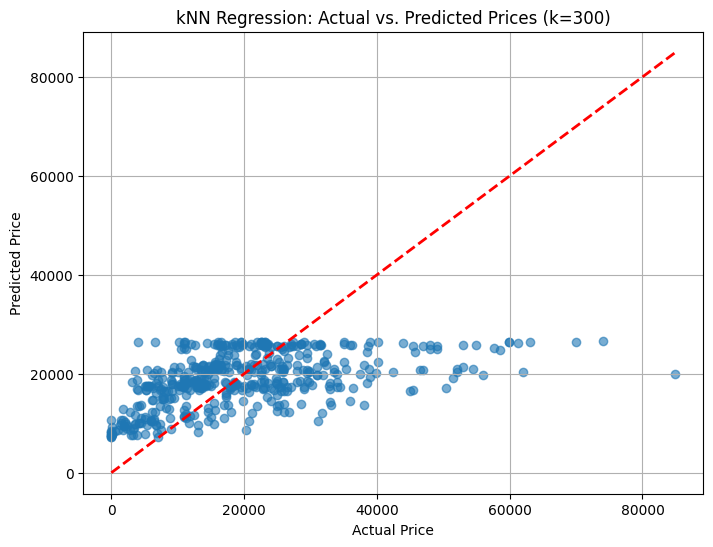

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    # Initialize and train the kNN regressor
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'k = {k}, Mean Squared Error (MSE): {mse:.2f}')

    # Create scatterplot of actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'kNN Regression: Actual vs. Predicted Prices (k={k})')
    plt.grid(True)
    plt.show()

#GeminiAI

In [ ]:
import pandas as pd

k_values = [3, 10, 25, 50, 100, 300]
mse_values = [
    159200762.09,
    138929910.76,
    130605395.06,
    129637841.19,
    128157897.62,
    131470944.20
]

mse_table = pd.DataFrame({
    'k Value': k_values,
    'Mean Squared Error (MSE)': mse_values
})

display(mse_table)

,k Value,Mean Squared Error (MSE)
0,3,1.592008e+08
1,10,1.389299e+08
2,25,1.306054e+08
3,50,1.296378e+08
4,100,1.281579e+08
5,300,1.314709e+08


In [ ]:
k_bar = 300
SSE = []
SSE_on_train = []

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum( (y_test-y_hat)**2 ))
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

[88]


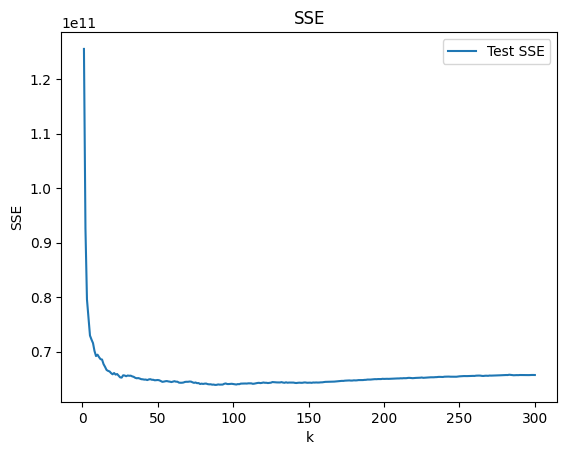

In [ ]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [12]:
lion_king = pd.read_csv("./KNN/data/zoo.csv")
lion_king.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
lion_king.shape

(101, 18)

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

# Task
**Task**: Perform an exploratory data analysis on the `lion_king` DataFrame to understand the characteristics of different animal classes. This includes grouping animals by their class and listing species, analyzing the size and distribution of each class, and examining how features (like `hair`, `feathers`, `milk`, etc.) vary across classes using descriptive statistics. Finally, identify which variables appear to be most predictive for distinguishing between the different animal classes based on this analysis.

## Explore Class Labels and Animal Names

### Subtask:
Group the `lion_king` DataFrame by the 'class' column and print the 'animal' names for each class to understand the types of animals within each group.


**Reasoning**:
To understand the types of animals within each class, I need to group the `lion_king` DataFrame by the 'class' column and then iterate through each group to print the unique 'animal' names for each class.



In [13]:
for class_label, group in lion_king.groupby('class'):
    animal_names = group['animal'].unique()
    print(f"Class {class_label}: {', '.join(animal_names)}")

Class 1: aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Class 2: chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
Class 3: pitviper, seasnake, slowworm, tortoise, tuatara
Class 4: bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
Class 5: frog, newt, toad
Class 6: flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
Class 7: clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm


**Reasoning**:
The previous subtask of listing animal names per class is complete. The next logical step in the exploratory data analysis is to analyze the size and distribution of each class to understand class imbalances. This can be done by calculating the value counts for the 'class' column and displaying them.



In [14]:
print("Class Distribution:\n", lion_king['class'].value_counts().sort_index())


Class Distribution:
 class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64


**Reasoning**:
To understand how features vary across classes, I will calculate descriptive statistics for all characteristic features, grouped by the 'class' column. Since many features are binary, the mean will indicate the proportion of animals in each class that possess that characteristic, which can help identify potentially predictive variables.



In [15]:
feature_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
class_feature_stats = lion_king.groupby('class')[feature_columns].mean()
print("Descriptive statistics of features by class (mean values):")
display(class_feature_stats)

Descriptive statistics of features by class (mean values):


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000


### Identification of Potentially Predictive Variables

Based on the `class_feature_stats` DataFrame, several features stand out as potentially strong predictors for distinguishing between animal classes:

*   **`milk`**: This feature is 1.0 for Class 1 (mammals) and 0.0 for all other classes. This makes `milk` a perfect differentiator for mammals.
*   **`feathers`**: This feature is 1.0 for Class 2 (birds) and 0.0 for all other classes. This makes `feathers` a perfect differentiator for birds.
*   **`eggs`**: While not a perfect differentiator, its values vary significantly: 0.02 for Class 1, 1.0 for Class 2, 0.8 for Class 3, 1.0 for Class 4, 1.0 for Class 5, 1.0 for Class 6, and 0.9 for Class 7. This clearly indicates that most non-mammals lay eggs, making it a strong indicator.
*   **`airborne`**: This feature is high for Class 2 (birds, 0.8) and Class 6 (invertebrates, 0.75), and very low or 0.0 for most other classes. This can help distinguish flying animals.
*   **`fins`**: This feature is 1.0 for Class 4 (fish) and 0.0 for most other classes, making it a strong predictor for fish.
*   **`breathes`**: Varies significantly; 1.0 for Class 1, 2, 5, 6, 0.8 for Class 3, 0.0 for Class 4, and 0.3 for Class 7. This suggests `breathes` can help separate aquatic-only breathers from air-breathers.
*   **`legs`**: This is a numerical feature with distinct means: Class 4 (fish) has 0.0 legs, Class 2 (birds) has 2.0, Class 1 (mammals) has around 3.37, Class 5 (amphibians) has 4.0, Class 6 (invertebrates) has 6.0, and Class 7 (invertebrates) has around 3.7. The clear differences in leg counts make this a very strong predictor.
*   **`backbone`**: This is 1.0 for classes 1, 2, 3, 4, 5 (vertebrates) and 0.0 for classes 6, 7 (invertebrates). This is a perfect differentiator between vertebrates and invertebrates.

In summary, `milk`, `feathers`, `fins`, `backbone`, `eggs`, `airborne`, `breathes`, and `legs` appear to be the most predictive variables due to their distinct and often binary values across different animal classes.

## Final Task

### Subtask:
Summarize the findings from the EDA, including descriptions of each class, their sizes, the variation in features, and a conclusion on which variables are likely the best predictors for classification.


## Summary:

### Q&A
*   **Descriptions of each class:** The analysis grouped animals by their class labels. For instance, Class 1 primarily contains mammals, Class 2 contains birds, Class 4 contains fish, Class 5 contains amphibians, and Classes 6 and 7 primarily contain invertebrates.
*   **Sizes of each class:** The class distribution showed varying sizes: Class 1 (mammals) had the most entries with 41 animals, while Class 5 (amphibians) had the fewest with 4 animals.
*   **Variation in features:** Features like `milk`, `feathers`, `eggs`, `airborne`, `aquatic`, `predator`, `toothed`, `backbone`, `breathes`, `venomous`, `fins`, `legs`, `tail`, `domestic`, and `catsize` showed distinct average values across different animal classes, indicating their varying prevalence within each group.
*   **Conclusion on which variables are likely the best predictors for classification:** Based on the mean values, `milk`, `feathers`, `fins`, and `backbone` are identified as highly predictive variables due to their distinct, often binary, values that perfectly or near-perfectly differentiate specific classes. Other strong predictors include `eggs`, `airborne`, `breathes`, and `legs`, which show significant variation and discriminatory power across classes.

### Data Analysis Key Findings
*   The dataset contains distinct animal classes, with Class 1 predominantly featuring mammals, Class 2 birds, Class 4 fish, and Classes 6 and 7 invertebrates.
*   The class distribution is uneven, with Class 1 (mammals) being the largest group with 41 animals, and Class 5 (amphibians) being the smallest with 4 animals.
*   Key features show significant variation across classes:
    *   `milk` is a perfect differentiator for Class 1 (mammals), being 1.0 for this class and 0.0 for all others.
    *   `feathers` is a perfect differentiator for Class 2 (birds), being 1.0 for this class and 0.0 for all others.
    *   `fins` is a strong predictor for Class 4 (fish), being 1.0 for this class and 0.0 for most others.
    *   `backbone` is a perfect differentiator between vertebrates (Classes 1-5, all 1.0) and invertebrates (Classes 6-7, all 0.0).
    *   `legs` shows distinct average counts: 0.0 for Class 4 (fish), 2.0 for Class 2 (birds), approximately 3.37 for Class 1 (mammals), 4.0 for Class 5 (amphibians), and 6.0 for Class 6 (invertebrates).
    *   `eggs` is 1.0 for Class 2, 4, 5, 6, and 0.9 for Class 7, while being very low for Class 1 (0.02), indicating it's a strong indicator for non-mammals.

### Insights or Next Steps
*   The identified highly predictive features (`milk`, `feathers`, `fins`, `backbone`, `legs`, `eggs`, `airborne`, `breathes`) can be prioritized for feature selection in a machine learning classification model to distinguish between animal classes.
*   Further analysis could involve exploring the correlations between these highly predictive features and using them to build a simple decision tree or rule-based classifier to demonstrate their effectiveness in classification.
